# 32931 Technology Research Methods (SPRING 2019)
Quantitative Lab 2
(using PYTHON)

Compiled by Mahrita Harahap

# One Sample T-Test and Non-Parametric Equivalent

These questions have been taken from P. Petocz, Statistical laboratory exercises using Minitab: a guide to understanding data, Jacaranda Wiley, 1998. 

The Earth's atmosphere

The composition of the Earth's atmosphere has seen some major changes in the past. One source of information about these changes is bubbles of gas inside ancient amber, a tree resin that has hardened and been trapped in rocks. Measurements on specimens from the late Cretaceous era (75 to 95 million years ago) gave these percentages of nitrogen:

63.4	65.0	64.4	63.3	54.8	64.5	60.8	49.1	51.0

(Data from Berner, R. A. and Landis, G. P. 1988, 'Gas bubbles in fossil amber as possible indicators of the major gas composition of ancient air', Science, vol. 239, pp. 1406-9.)

Use Python to obtain the histogram, boxplot and a normal probability plot for Nitrogen. Comment on the normality, skewness and outliers in the data.

C:\Users\mahrita\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


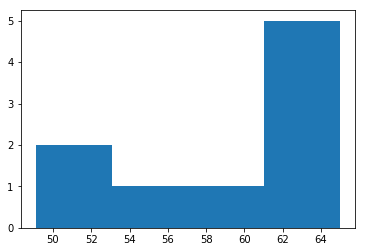

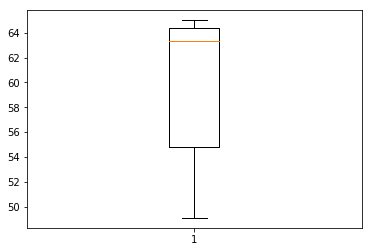

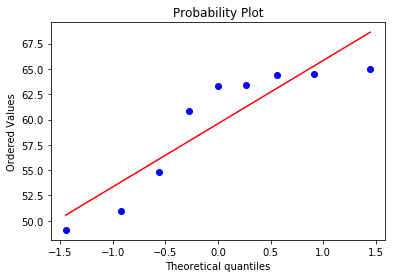

In [1]:
import matplotlib.pyplot as plt
import pylab
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

x=np.array([63.4,65,64.4,63.3,54.8,64.5,60.8,49.1,51])

plt.hist(x, bins=4) 
plt.show()

plt.boxplot(x)
plt.show()

stats.probplot(x, dist="norm", plot=pylab)
pylab.show()

It is difficult to be too confident of the distribution with so few samples, but the distribution appears to be left skewed.

We can formally conclude that the data are normally distributed by doing a 1 sample KS.


In [2]:
print('lilliefors:  D , P_Value',sm.stats.diagnostic.lilliefors(x, pvalmethod='approx'))

lilliefors:  D , P_Value (0.27905730886053159, 0.041827052998375865)


H0: data are normally distributed <br>
H1: data are not normally distributed <br>
K-S=0.279 <br>
Since p = 0.042< 0.05, we reject the null hypothesis. <br>
We conclude that the Nitrogen levels are not normally distributed at the 5% level of significance. <br>

Suppose the normality assumption in the data had not been violated. The present value for nitrogen in the air is 78.1%. Is this significantly different from the late Cretaceous air? Write down null and alternative hypotheses. Then carry out the test and answer the question using t-test choosing the appropriate alternative.

In [5]:
t_statistic, p_value =stats.ttest_1samp(x, 78.1)
print("t_statistic, p_value",t_statistic, p_value)

t_statistic, p_value -8.87782389745 2.04877795654e-05


H0: µ = 78.1 <br>
H1: µ ≠ 78.1<br>
t-test=-8.878<br>
Since p =2.049e-05≈0.000 < 0.05, we reject the null hypothesis.<br>
We conclude that the mean nitrogen level from the late Cretaceous period is significantly different to that of present day air.<br>


Since the normality assumption in the data had been violated and the use of the one sample t-test is deemed inappropriate. We have to use a Nonparametric test, specifically a 1-sample Wilcoxon test. The present value for nitrogen in the air is 78.1%. Is this significantly different from the late Cretaceous air? Write down null and alternative hypotheses. Then carry out the test and answer the question using the Wilcoxon Test.


In [9]:
z_statistic, p_value = stats.wilcoxon(x-78.1)
print("z_statistic, p_value",z_statistic, p_value)

z_statistic, p_value 0.0 0.00768579405521


C:\Users\mahrita\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


H0: median= 78.1 <br>
H1: median ≠ 78.1<br>
Since p = 0.007< 0.05, we reject the null hypothesis. We conclude that the mean nitrogen level from the late Cretaceous period is significantly different to that of present day air.


Another source of information about changes to the Earth's atmosphere is obtained by analysing bubbles from samples of ice from beneath the Arctic and Antarctic icecaps. Data for this section have been extracted from two graphs, one in Graedel, T. E. and Crutzen, P.J. 1989, 'The changing atmosphere', Scientific American, Sept., pp. 28-36; the other in Houghton, R. A. and Woodwell, G. M. 1989, 'Global climatic change', Scientific American, April, pp. 18-26.

Get the measurements from the data disk from the worksheet “methane.sav”. Methane values are given in parts per billion (ppb) for several time periods. Here, we will concentrate on the values in the variable M1-3th (methane levels 1000 to 3000 years ago). Use an appropriate graph to comment on the shape of the data. Test whether the data is normally distributed.


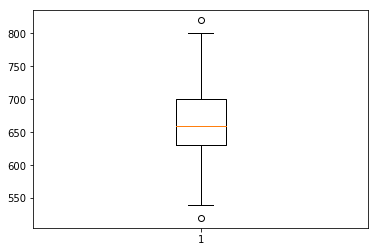

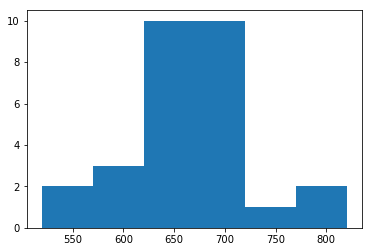

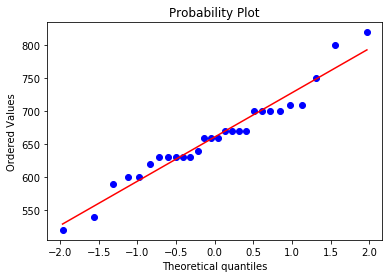

lilliefors:  D , P_Value (0.1247788242102561, 0.31202189797716279)


In [10]:
x=np.array([710,600,520,540,590,670,660,630,820,660,630,630,670,700,640,600,630,670,700,800,630,620,670,700,750,710,660,700])

plt.boxplot(x)
plt.show()

plt.hist(x, bins=6) 
plt.show()

stats.probplot(x, dist="norm", plot=pylab)
pylab.show()

print('lilliefors:  D , P_Value',sm.stats.diagnostic.lilliefors(x, pvalmethod='approx'))


By constructing a histogram we see that visually the data appears normally distributed.
We then formally conclude that the data are normally distributed by doing a 1 sample KS.

H0: data are normally distributed <br>
H1: data are not normally distributed <br>
K.S=0.125 <br>
Since p = 0.3199 > 0.05, we do not reject the null hypothesis.
We conclude that the methane levels 1000-3000 years ago are normally distributed.


Find a 95% confidence interval for mean methane levels 1000 to 3000 years ago. Use t.test , and enter a test value of 0. Explain exactly what this interval represents. Would a 99% confidence interval be wider or narrower than the 95% interval? 

In [13]:
t_statistic, p_value =stats.ttest_1samp(x, 0)
print("t_statistic",t_statistic)

conf_int_x = stats.norm.interval(0.95, loc=x.mean(), scale= np.std(x)/round(np.sqrt(len(x))))
print("conf interval 95 percent ",conf_int_x)


conf_int_x = stats.norm.interval(0.99, loc=x.mean(), scale= np.std(x)/round(np.sqrt(len(x))))
print("conf interval 99 percent ",conf_int_x)


t_statistic 52.988345927
conf interval 95 percent  (635.66006362991345, 686.48279351294366)
conf interval 99 percent  (627.67523406181863, 694.46762308103848)


95% CI = (635.47, 686.67). We are 95% confident that the mean methane levels 1000 to 3000 years ago were between 635.47 and 686.67 ppb.

We would expect the 99% confidence interval to be wider than the 95% confidence interval since we are more confident that the population mean is in the range.

99% CI = (626.50, 695.64)


The present methane level is about 1500 ppb, obviously a much higher value than in the past. But it is generally held that 10 000 years ago methane levels were about 700 ppb. Do these data indicate that levels of methane dropped before they rose to present levels? Write down null and alternative hypotheses, then carry out the test and answer the question.  Use t-test choosing the appropriate Test value=700 and Confidence Interval Percentage=95%.

In [14]:
t_statistic, p_value =stats.ttest_1samp(x,700)
print("t_statistic, p_value",t_statistic, p_value/2)

t_statistic, p_value -3.12032939278 0.00213460384641


H0: µ = 700 <br>
H1: µ < 700<br>
t-test=-3.12<br>
Since this is a one tailed test, we should divide the P-value by 2. <br>
Since P-value = 0.004/2=0.002 < 0.05, we reject the null hypothesis.

We conclude that the levels of methane did drop before they rose to the present level.


# One sample Proportion Test

Going back to the “Attitudes towards the Library” survey that we used last week (Attitudes.csv), the library manager assumes that greater than 50% of their users use the study rooms and therefore they should not scrap the feature and replace it with a multimedia room to cater for their users. To test whether the library manager is right, conduct a one sample proportion test by prop.test and select the appropriate hypothesis and alternative.

In [16]:
import pandas as pd
Attitudes = pd.read_csv('C:/Users/mahrita/Google Drive/32931 TRM/32931 Spring 2017/Week 2/Attitudes.csv')

In [17]:
Attitudes

,Sex,Service,Visits,ClosedReserve,StudyAreas,SearchFacilities,JournalCollections,Photocopiers
0,M,Agree,2,1,0,0,0,0
1,F,Strongly Agree,5,0,1,1,1,1
2,F,Agree,0,0,0,0,0,0
3,M,Neutral,1,1,1,1,0,1
4,F,Agree,3,0,1,1,0,1
5,F,Neutral,2,0,1,1,0,1
6,M,Disagree,1,0,0,0,1,1
7,M,Neutral,3,1,1,1,0,1
8,F,Neutral,4,1,1,1,0,1
9,F,Agree,2,0,1,0,1,1


In [53]:
import statsmodels.api as sm
count = Attitudes.groupby('StudyAreas')['StudyAreas'].count()[1]
nobs = Attitudes.groupby('StudyAreas')['StudyAreas'].count().sum()
value = .5
z_score, p_value = sm.stats.proportions_ztest(count, nobs, value,alternative='larger')
print(z_score, p_value )

0.585540043769 0.279092324711


H0: p = 0.5 <br>
H1: p > 0.5<br>

Since P-value = 0.28 > 0.05, we do not reject the null hypothesis.<br>

We do not have enough statistical evidence, to prove that the proportion of users who do use the study rooms is greater than 50%. Therefore the library shall scrap this feature and replace it with a multimedia room.
